# pyFiDEL 

This is simple tutorial to demonstrate the usage of pyFiDEL package

In [1]:
from pyFiDEL import SimClassifier, PCR, FiDEL

from pyFiDEL.ranks import (
    get_fermi_min,
    get_fermi_root,
    build_correspond_table,
    get_lambda,
    build_metric,
)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

## Gaussian Score Classifier

we can create arbitrary binary classifier which has two Gaussian score distribution. 

In [2]:
# create simulator

c = SimClassifier(N=10000, rho=0.5)

# generate Gaussian score with target AUC

score = c.create_gaussian_scores(auc0=0.9, tol=1e-4)

INFO:simulator:Final AUC: 0.899914 (iter: 52) mu2: 1.812388


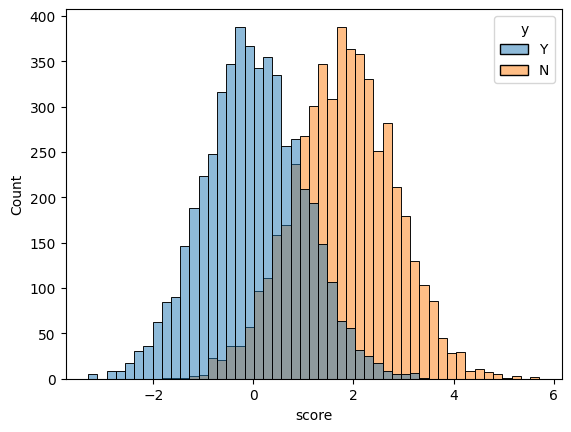

In [3]:
# show score histogram

c.plot_score()

plt.savefig("score_dist.pdf", dpi=300)

In [4]:
# calculate metric and build curve information

df, info = build_metric(c.score, c.y)
df

,score,y,rank,tpr,fpr,bac,prec
0,-3.302902,Y,1,0.0002,0.0000,0.5001,1.00000
1,-3.286379,Y,2,0.0004,0.0000,0.5002,1.00000
2,-3.284194,Y,3,0.0006,0.0000,0.5003,1.00000
3,-3.176618,Y,4,0.0008,0.0000,0.5004,1.00000
4,-3.136191,Y,5,0.0010,0.0000,0.5005,1.00000
...,...,...,...,...,...,...,...
9995,5.164588,N,9996,1.0000,0.9992,0.5004,0.50020
9996,5.176035,N,9997,1.0000,0.9994,0.5003,0.50015
9997,5.306933,N,9998,1.0000,0.9996,0.5002,0.50010
9998,5.594221,N,9999,1.0000,0.9998,0.5001,0.50005


In [5]:
info

{'auc_rank': 0.89991376,
 'auc_bac': 0.89991376,
 'auprc': 0.8990027084891962,
 'rho': 0.5,
 'beta': 7.556168466325063,
 'mu': 0.5,
 'r_star': 0.5}

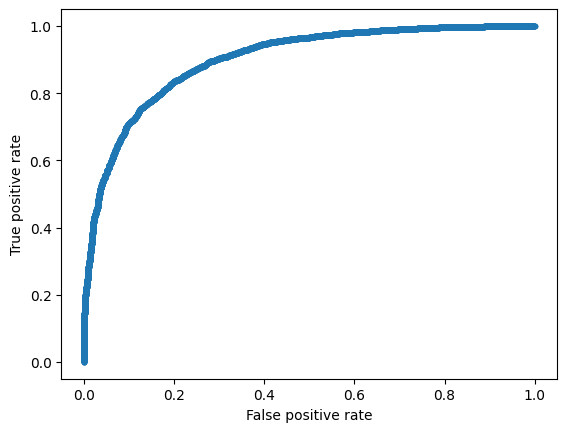

In [6]:
# Plot ROC curve

plt.plot(df["fpr"], df["tpr"], ".")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.savefig("roc_curve.pdf", dpi=300)

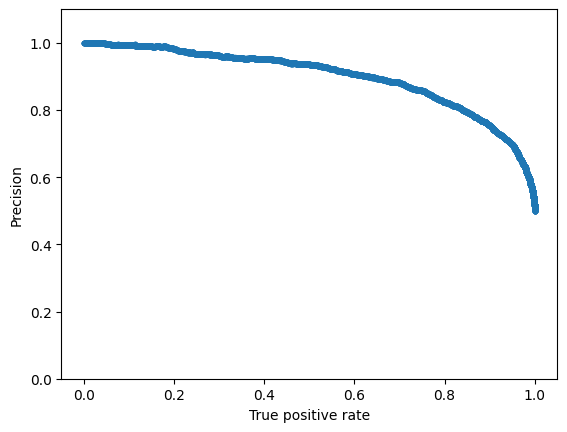

In [7]:
# plot precision-recall curve

plt.plot(df["tpr"], df["prec"], ".")
plt.xlabel("True positive rate")
plt.ylabel("Precision")
plt.ylim(0, 1.1)

plt.savefig("prec_curve.pdf", dpi=300)

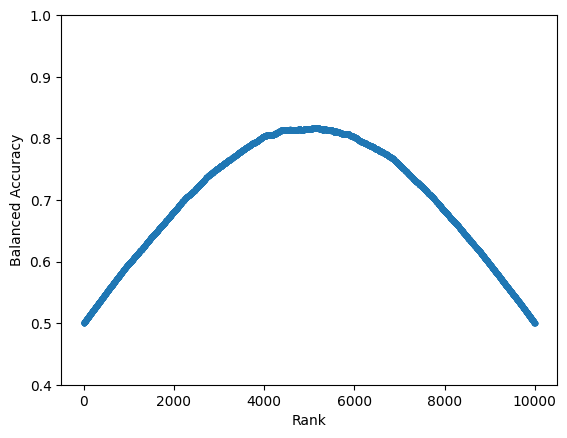

In [8]:
# plot balanced accuracy curve

plt.plot(df["rank"], df["bac"], ".")
plt.xlabel("Rank")
plt.ylabel("Balanced Accuracy")
plt.ylim(0.4, 1)

plt.savefig("bac_curve.pdf", dpi=300)

# Fermi-Dirac distribution

From AUC and rho, we can find the corresponding beta, mu so that we can represent probability at given rank as a Fermi-Dirac distribution

In [9]:
# minimum optimization method

auclist = [0.6, 0.7, 0.8, 0.9]
ans = pd.DataFrame()

for auc in auclist:
    ans = ans.append(get_fermi_min(auc, 0.5, resol=1e-5), ignore_index=True)

ans

/var/folders/8n/5n92k0h13y142np886c77_1w0000gn/T/ipykernel_30234/4257245348.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(get_fermi_min(auc, 0.5, resol=1e-5), ignore_index=True)
/var/folders/8n/5n92k0h13y142np886c77_1w0000gn/T/ipykernel_30234/4257245348.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(get_fermi_min(auc, 0.5, resol=1e-5), ignore_index=True)
/var/folders/8n/5n92k0h13y142np886c77_1w0000gn/T/ipykernel_30234/4257245348.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(get_fermi_min(auc, 0.5, resol=1e-5), ignore_index=True)
/var/folders/8n/5n92k0h13y142np886c77_1w0000gn/T/ipykernel_30234/4257245348.py:7: FutureWarning: The frame.append method is deprec

,beta,mu,r_star
0,1.220736,0.499996,0.499996
1,2.595059,0.499997,0.499997
2,4.394915,0.499997,0.499997
3,7.560261,0.500003,0.500003


In [10]:
# root-find optimization method

auclist = [0.6, 0.7, 0.8, 0.9]
ans = pd.DataFrame()

for auc in auclist:
    ans = ans.append(get_fermi_root(auc, 0.5), ignore_index=True)

ans

/var/folders/8n/5n92k0h13y142np886c77_1w0000gn/T/ipykernel_30234/1748380048.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(get_fermi_root(auc, 0.5), ignore_index=True)
/var/folders/8n/5n92k0h13y142np886c77_1w0000gn/T/ipykernel_30234/1748380048.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(get_fermi_root(auc, 0.5), ignore_index=True)
/var/folders/8n/5n92k0h13y142np886c77_1w0000gn/T/ipykernel_30234/1748380048.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(get_fermi_root(auc, 0.5), ignore_index=True)
/var/folders/8n/5n92k0h13y142np886c77_1w0000gn/T/ipykernel_30234/1748380048.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pan

,beta,mu,r_star
0,1.222231,0.5,0.5
1,2.595283,0.5,0.5
2,4.394618,0.5,0.5
3,7.560362,0.5,0.5


In [11]:
# find lambda1 and lambda2 using approximation formula

auclist = [0.6, 0.7, 0.8, 0.9]
ans = pd.DataFrame()

for auc in auclist:
    ans = ans.append(get_lambda(auc, 0.5), ignore_index=True)

# check with beta, mu
ans["beta"] = ans["l2"] * 1000
ans["mu"] = -ans["l1"] / (1000 * ans["l2"])
ans

/var/folders/8n/5n92k0h13y142np886c77_1w0000gn/T/ipykernel_30234/3778582204.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(get_lambda(auc, 0.5), ignore_index=True)
/var/folders/8n/5n92k0h13y142np886c77_1w0000gn/T/ipykernel_30234/3778582204.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(get_lambda(auc, 0.5), ignore_index=True)
/var/folders/8n/5n92k0h13y142np886c77_1w0000gn/T/ipykernel_30234/3778582204.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(get_lambda(auc, 0.5), ignore_index=True)
/var/folders/8n/5n92k0h13y142np886c77_1w0000gn/T/ipykernel_30234/3778582204.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

,l1low,l2low,l1high,l2high,l1,l2,r_star,beta,mu
0,-0.540601,0.0012,-1.290994,0.002582,-0.690679,0.001476,467.813541,1.476399,0.467814
1,-0.961201,0.0024,-1.490712,0.002981,-1.173005,0.002633,445.574064,2.632571,0.445574
2,-1.261801,0.0036,-1.825742,0.003651,-1.600166,0.003631,440.708720,3.630892,0.440709
3,-1.442401,0.0048,-2.581989,0.005164,-2.354071,0.005091,462.381988,5.091183,0.462382


In [12]:
# create correpondence table

auclist = np.linspace(0.52, 0.98, num=47)
rholist = np.linspace(0.1, 0.9, num=17)

df = build_correspond_table(auclist, rholist, resol=1e-5, method="root")
df

/Users/skim/CoreData/Local_Keep/git_repos/pyFiDEL/pyFiDEL/ranks.py:200: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(row, ignore_index=True)
/Users/skim/CoreData/Local_Keep/git_repos/pyFiDEL/pyFiDEL/ranks.py:200: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(row, ignore_index=True)
/Users/skim/CoreData/Local_Keep/git_repos/pyFiDEL/pyFiDEL/ranks.py:200: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(row, ignore_index=True)
/Users/skim/CoreData/Local_Keep/git_repos/pyFiDEL/pyFiDEL/ranks.py:200: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ans = ans.append(row, ignore_index=True)
/Users/s

,auc,rho,beta,mu,r_star
0,0.52,0.10,0.240210,-8.655104,0.491996
1,0.52,0.15,0.240201,-6.728451,0.492997
2,0.52,0.20,0.240194,-5.277569,0.493997
3,0.52,0.25,0.240187,-4.078982,0.494998
4,0.52,0.30,0.240182,-3.031731,0.495998
...,...,...,...,...,...
794,0.98,0.70,19.676180,0.700139,0.657077
795,0.98,0.75,20.720782,0.750272,0.697252
796,0.98,0.80,22.225303,0.800531,0.738157
797,0.98,0.85,24.449517,0.851058,0.780112


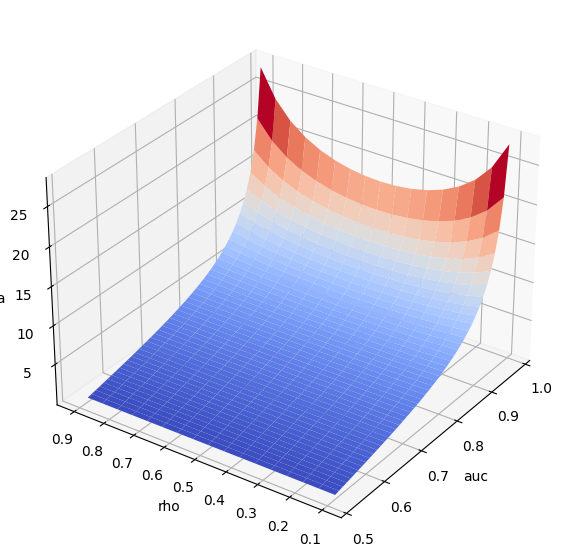

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

X = df["auc"].values.reshape((len(auclist), len(rholist)))
Y = df["rho"].values.reshape((len(auclist), len(rholist)))
Z = df["beta"].values.reshape((len(auclist), len(rholist)))

surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, cmap=cm.coolwarm)
ax.set_xlabel("auc")
ax.set_ylabel("rho")
ax.set_zlabel("beta")
ax.view_init(30, 215)

plt.savefig("beta_surface.pdf", dpi=300)

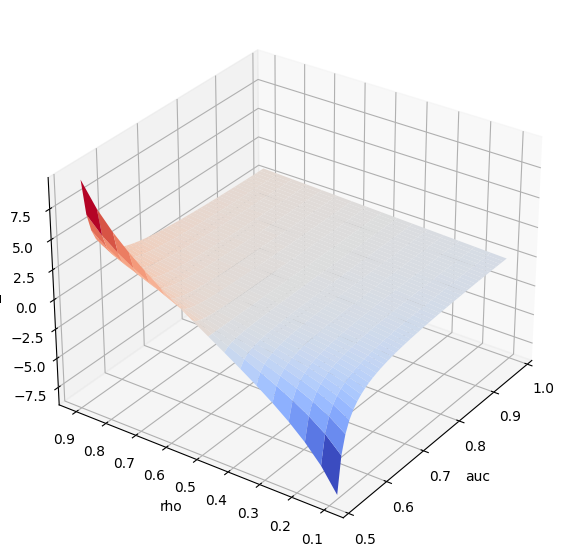

In [14]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

Z = df["mu"].values.reshape((len(auclist), len(rholist)))

surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, cmap=cm.coolwarm)
ax.set_xlabel("auc")
ax.set_ylabel("rho")
ax.set_zlabel("mu")
ax.view_init(30, 215)

plt.savefig("mu_surface.pdf", dpi=300)

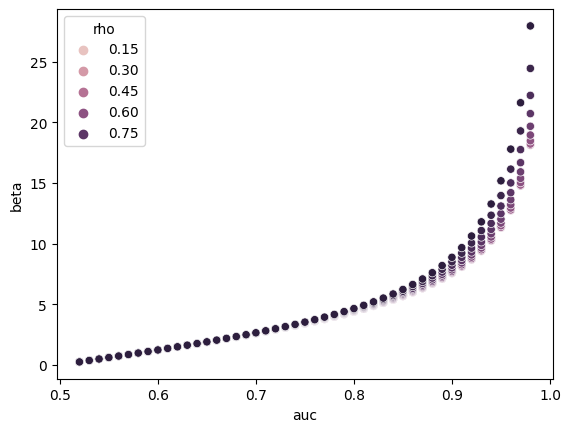

In [15]:
sns.scatterplot(data=df, x="auc", y="beta", hue="rho")
plt.savefig("auc-beta.pdf", dpi=300)

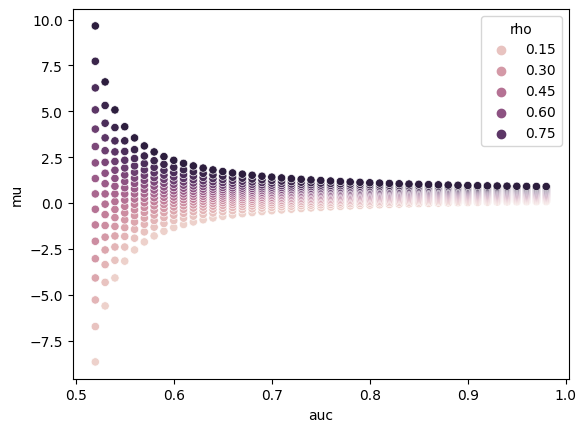

In [16]:
sns.scatterplot(data=df, x="auc", y="mu", hue="rho")
plt.savefig("auc-mu.pdf", dpi=300)

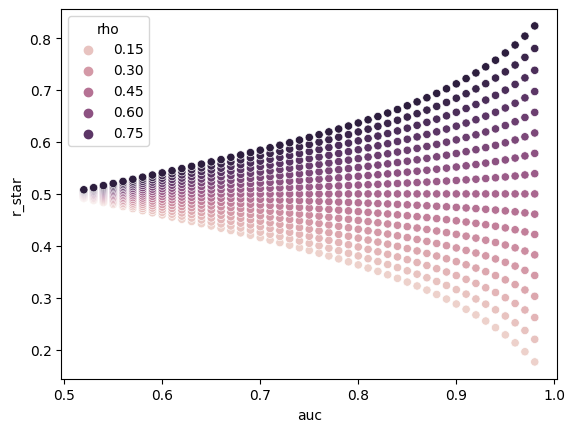

In [17]:
sns.scatterplot(data=df, x="auc", y="r_star", hue="rho")
plt.savefig("auc-r_star.pdf", dpi=300)

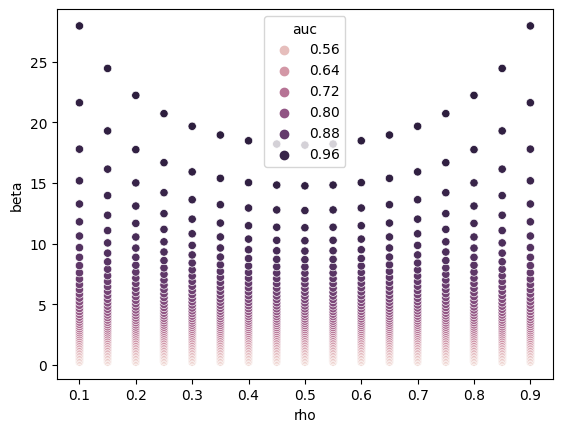

In [18]:
sns.scatterplot(data=df, x="rho", y="beta", hue="auc")
plt.savefig("rho-beta.pdf", dpi=300)

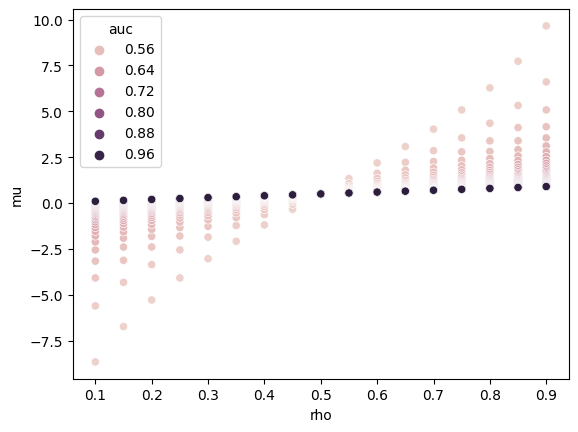

In [19]:
sns.scatterplot(data=df, x="rho", y="mu", hue="auc")
plt.savefig("rho-mu.pdf", dpi=300)

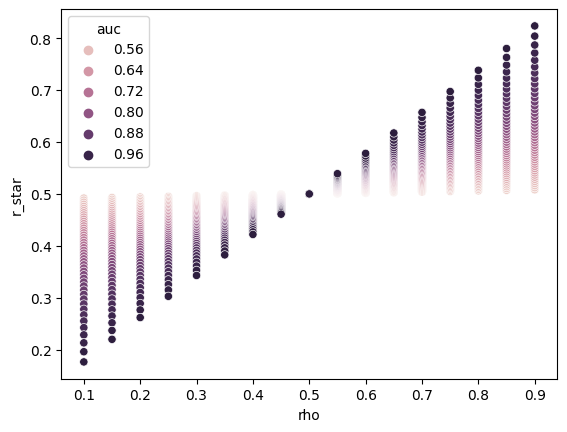

In [20]:
sns.scatterplot(data=df, x="rho", y="r_star", hue="auc")
plt.savefig("rho-r_star.pdf", dpi=300)

## Probability of class at given rank

In [21]:
# create simulator

c = SimClassifier(N=10000, rho=0.6)

# generate Gaussian score with target AUC

score = c.create_gaussian_scores(auc0=0.85)

INFO:simulator:Final AUC: 0.849994 (iter: 8) mu2: 1.465738


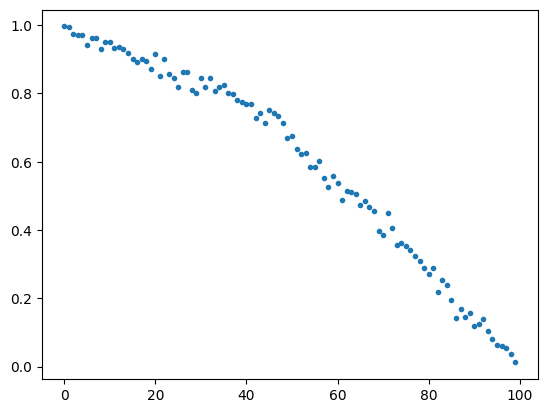

In [22]:
p = PCR(c.score, c.y, sample_size=100, sample_n=500)
plt.plot(p.pcr, ".")

In [23]:
# calculate from pcr

df, info = p.build_metric()
info

INFO:ci:... Pxy integral calculation with resolution = 0.000001
INFO:ci:... Pxxy integral calculation with resolution = 0.000001
INFO:ci:... Pxyy integral calculation with resolution = 0.000001


... build metric parameters (N = 100)


{'auc_rank': 0.84724,
 'auc_bac': 0.8472400000000002,
 'auprc': 0.8659079590711128,
 'rho': 0.6,
 'beta': 5.616781013159074,
 'mu': 0.613668564666484,
 'r_star': 0.5414804008128044,
 'var_auc': 0.0015432565593201312,
 'Pxy': 0.847239913578057,
 'Pxxy': 0.7518740968412027,
 'Pxyy': 0.7579419425634587,
 'auc0': 0.84724,
 'auc sigma': 0.03928430423617212,
 '95% ci': [0.7702427636971027, 0.9242372363028973]}

In [24]:
# compare with original score

df0, info0 = build_metric(c.score, c.y)
info0

{'auc_rank': 0.8499940833333334,
 'auc_bac': 0.8499940833333335,
 'auprc': 0.8877528017593349,
 'rho': 0.6,
 'beta': 5.699717080683677,
 'mu': 0.6130970454750275,
 'r_star': 0.5419592850619214}

In [25]:
df

,rank,prob,tpr,fpr,bac,prec
0,1.0,0.996,0.016600,0.00010,0.508250,0.996000
1,2.0,0.994,0.033167,0.00025,0.516458,0.995000
2,3.0,0.974,0.049400,0.00090,0.524250,0.988000
3,4.0,0.970,0.065567,0.00165,0.531958,0.983500
4,5.0,0.970,0.081733,0.00240,0.539667,0.980800
...,...,...,...,...,...,...
95,96.0,0.064,0.997300,0.90405,0.546625,0.623313
96,97.0,0.060,0.998300,0.92755,0.535375,0.617505
97,98.0,0.054,0.999200,0.95120,0.524000,0.611755
98,99.0,0.036,0.999800,0.97530,0.512250,0.605939


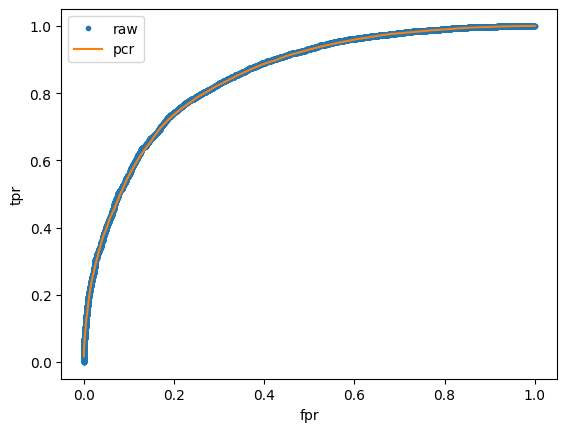

In [26]:
# compare ROC curve

plt.plot(df0["fpr"], df0["tpr"], ".", label="raw")
plt.plot(df["fpr"], df["tpr"], "-", label="pcr")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.show()

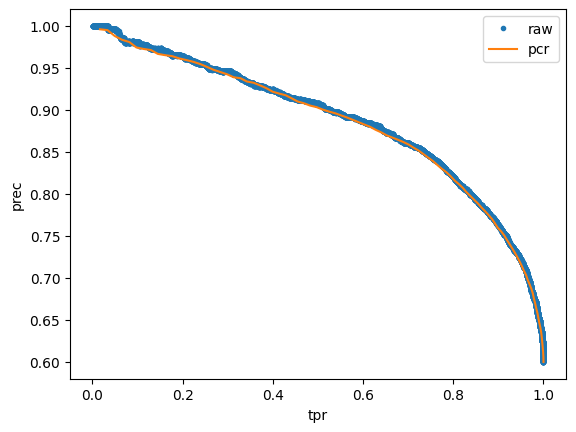

In [27]:
# compare precision-recall curve

plt.plot(df0["tpr"], df0["prec"], ".", label="raw")
plt.plot(df["tpr"], df["prec"], "-", label="pcr")
plt.xlabel("tpr")
plt.ylabel("prec")
plt.legend()
plt.show()

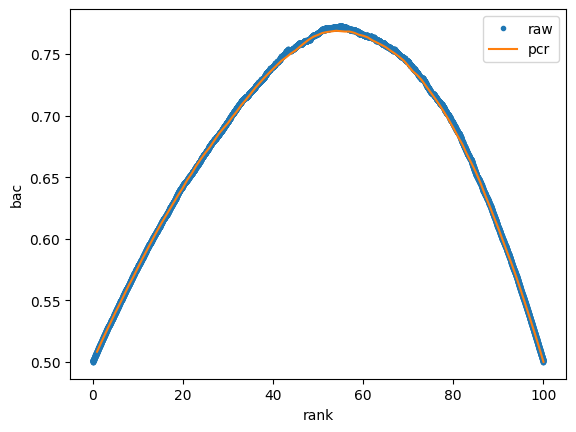

In [28]:
# compare balanced accuracy curve

plt.plot(df0["rank"] / 100.0, df0["bac"], ".", label="raw")
plt.plot(df["rank"], df["bac"], "-", label="pcr")
plt.xlabel("rank")
plt.ylabel("bac")
plt.legend()
plt.show()

In [29]:
p.check_fermi()

{'MAE': 0.02798388890914367,
 'RMSE': 0.03520142033554523,
 'SSEV': 100.52534836180568}

In [30]:
p.df

,rank,prob,tpr,fpr,bac,prec,fy,err
0,1.0,0.996,0.016600,0.00010,0.508250,0.996000,0.967412,0.028588
1,2.0,0.994,0.033167,0.00025,0.516458,0.995000,0.965594,0.028406
2,3.0,0.974,0.049400,0.00090,0.524250,0.988000,0.963678,0.010322
3,4.0,0.970,0.065567,0.00165,0.531958,0.983500,0.961660,0.008340
4,5.0,0.970,0.081733,0.00240,0.539667,0.980800,0.959535,0.010465
...,...,...,...,...,...,...,...,...
95,96.0,0.064,0.997300,0.90405,0.546625,0.623313,0.125070,-0.061070
96,97.0,0.060,0.998300,0.92755,0.535375,0.617505,0.119052,-0.059052
97,98.0,0.054,0.999200,0.95120,0.524000,0.611755,0.113286,-0.059286
98,99.0,0.036,0.999800,0.97530,0.512250,0.605939,0.107766,-0.071766


In [31]:
p.df[["prob", "fy"]].corr(method="pearson")

,prob,fy
prob,1.000000,0.992945
fy,0.992945,1.000000


In [32]:
p.df[["prob", "fy"]].corr(method="kendall")

,prob,fy
prob,1.000000,0.963997
fy,0.963997,1.000000


In [33]:
p.df[["prob", "fy"]].corr(method="spearman")

,prob,fy
prob,1.000000,0.996973
fy,0.996973,1.000000


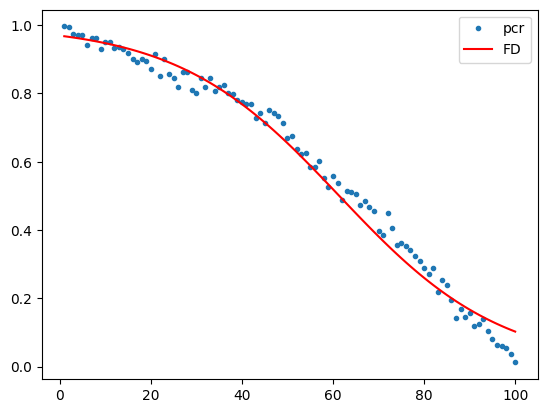

In [34]:
plt.plot(p.df["rank"], p.df["prob"], ".", label="pcr")
plt.plot(p.df["rank"], p.df["fy"], "r", label="FD")
plt.legend()
plt.show()

## FiDEL - ensemble method

In [1]:
from pyFiDEL import SimClassifier, PCR, FiDEL
import numpy as np

# prepare classifier results

n_samples = 1000
c = SimClassifier(N=n_samples, rho=0.7)
# auc_list = [0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66]
auc_list = np.linspace(0.55, 0.65, num=30)

# create predictions
prediction = c.create_predictions(n_methods=20, auc_list=auc_list)

INFO:simulator:Final AUC: 0.549990 (iter: 300) mu2: 0.177712
INFO:simulator:Final AUC: 0.553386 (iter: 218) mu2: 0.190040
INFO:simulator:Final AUC: 0.556919 (iter: 755) mu2: 0.202382
INFO:simulator:Final AUC: 0.560257 (iter: 220) mu2: 0.214739
INFO:simulator:Final AUC: 0.563829 (iter: 164) mu2: 0.227113
INFO:simulator:Final AUC: 0.567148 (iter: 208) mu2: 0.239504
INFO:simulator:Final AUC: 0.570757 (iter: 92) mu2: 0.251914
INFO:simulator:Final AUC: 0.574062 (iter: 178) mu2: 0.264343
INFO:simulator:Final AUC: 0.577505 (iter: 42) mu2: 0.276793
INFO:simulator:Final AUC: 0.580990 (iter: 139) mu2: 0.289264
INFO:simulator:Final AUC: 0.584457 (iter: 60) mu2: 0.301758
INFO:simulator:Final AUC: 0.587862 (iter: 328) mu2: 0.314275
INFO:simulator:Final AUC: 0.591324 (iter: 235) mu2: 0.326817
INFO:simulator:Final AUC: 0.594733 (iter: 365) mu2: 0.339385
INFO:simulator:Final AUC: 0.598195 (iter: 410) mu2: 0.351979
INFO:simulator:Final AUC: 0.601714 (iter: 166) mu2: 0.364602
INFO:simulator:Final AUC: 0

In [2]:
c.pred.shape

(1000, 30)

In [3]:
f = FiDEL()
f.add_predictions(c.pred)
f.add_label(c.y)

In [4]:
f.calculate_performance(alpha=1.0)

INFO:ensemble:... sample #: 1000, method #: 30
INFO:ensemble:... estimated auc (ensemble): 0.513857


In [5]:
f.calculate_performance(alpha=1.0, method="WoC")

INFO:ensemble:... sample #: 1000, method #: 30
/Users/skim/CoreData/Local_Keep/git_repos/pyFiDEL/pyFiDEL/ensemble.py:136: RuntimeWarning: overflow encountered in exp
  self.estimated_prob = 1.0 / (1.0 + np.exp(-self.estimated_logit))
INFO:ensemble:... estimated auc (ensemble): 0.510119


In [6]:
f.df

{'Name': ['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27', 'M28', 'M29'], 'AUC': [0.5499904761904763, 0.5533857142857143, 0.5569190476190476, 0.5602571428571428, 0.5638285714285713, 0.567147619047619, 0.5707571428571429, 0.5740619047619048, 0.5775047619047619, 0.5809904761904762, 0.5844571428571429, 0.5878619047619048, 0.5913238095238095, 0.5947333333333334, 0.5981952380952381, 0.6017142857142858, 0.6052190476190477, 0.6086238095238095, 0.6121619047619047, 0.6154285714285714, 0.6188714285714286, 0.6224619047619048, 0.6258714285714286, 0.6293380952380951, 0.6328142857142858, 0.6361095238095238, 0.6397190476190475, 0.6430809523809523, 0.6464809523809524, 0.6500285714285714], 'beta': [0.0006027494318804192, 0.0006441199928377934, 0.0006872650992923352, 0.0007281181181138916, 0.000771932170479563, 0.0008127536747567447, 0.0008572679103959373, 0.0008981395

,Name,AUC,beta,mu,r_star
0,M0,0.549990,0.000603,1915.749776,510.028235
1,M1,0.553386,0.000644,1826.148687,510.713877
2,M2,0.556919,0.000687,1744.282852,511.428367
3,M3,0.560257,0.000728,1675.786217,512.104337
4,M4,0.563829,0.000772,1610.461187,512.828658
5,M5,0.567148,0.000813,1556.005524,513.502873
6,M6,0.570757,0.000857,1502.607316,514.237344
7,M7,0.574062,0.000898,1458.303215,514.911005
8,M8,0.577505,0.000941,1416.186900,515.614104
9,M9,0.580990,0.000984,1377.214904,516.327362


In [7]:
f.estimated_prob

array([0.00000000e+000, 0.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.78404721e-096, 1.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.00000000e+000, 1.81045180e-063,
       0.00000000e+000, 2.01591519e-298, 0.00000000e+000, 1.16315703e-240,
       4.88666742e-215, 0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 4.72578444e-086, 0.00000000e+000,
       1.27555657e-237, 0.00000000e+000, 1.00000000e+000, 1.85786384e-073,
       0.00000000e+000, 1.08843850e-253, 1.52233598e-112, 1.00000000e+000,
       8.43468881e-078, 7.22283289e-018, 0.00000000e+000, 0.00000000e+000,
       2.51434530e-074, 5.39688075e-060, 1.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       4.53801960e-109, 0

# Confidence Interval

In [7]:
from pyFiDEL.ci import Pxy_int, Pxxy_int, Pxyy_int, var_auc_fermi
from pyFiDEL.ranks import get_fermi_root

In [8]:
auc = 0.9
rho = 0.5

bm = get_fermi_root(auc, rho)

In [9]:
bm

{'beta': 7.560362383181233, 'mu': 0.5, 'r_star': 0.5}

In [10]:
Pxy_int(bm["beta"], bm["mu"], rho)

INFO:ci:... Pxy integral calculation with resolution = 0.000001


0.8999999026468701

In [11]:
Pxxy_int(bm["beta"], bm["mu"], rho)

INFO:ci:... Pxxy integral calculation with resolution = 0.000001


0.8332453944182329

In [ ]:
Pxyy_int(bm["beta"], bm["mu"], rho)

... Pxyy integral calculation with resolution = 1e-06


0.8332453944182246

In [12]:
var_auc_fermi(auc, rho, N=1000)

INFO:ci:... Pxy integral calculation with resolution = 0.000001
INFO:ci:... Pxxy integral calculation with resolution = 0.000001
INFO:ci:... Pxyy integral calculation with resolution = 0.000001


{'var_auc': 9.315631436971133e-05,
 'Pxy': 0.8999999026468701,
 'Pxxy': 0.8332453944182329,
 'Pxyy': 0.8332453944182246,
 'beta': 7.560362383181233,
 'mu': 0.5,
 'auc0': 0.9,
 'rho': 0.5,
 'auc sigma': 0.009651751880861387,
 '95% ci': [0.8810825663135117, 0.9189174336864884]}